This notebook runs a number of statistical tests between variables to test for highly correlated features and optimizing the model for machine learning.

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import statsmodels as sm

In [2]:
kickstarter = pd.read_csv(r'kickstarter.csv', index_col=0)

In [3]:
# Shrink the dataset only to include possible relevant columns in statistical model.
# Staff pick and spotlight will not be in the final model, but relevant for statistical testing to see significance.

kickstarter = kickstarter[['binary_state', 'goal_USD', 'usd_pledged', 'backers_count', 'blurb', 'category_name', 'category_slug', 'location_country', 'location_type', 'month', 'day', 'spotlight', 'staff_pick']]

In [4]:
# Adding blurb length to model

def word_count(string):
    tokens = string.split()
    n_tokens = len(tokens)
    return(n_tokens)

kickstarter['blurb_length'] = kickstarter['blurb'].apply(lambda x: word_count(x))

In [5]:
staff_pick = pd.crosstab(kickstarter['binary_state'], kickstarter['staff_pick'])

In [6]:
spotlight = pd.crosstab(kickstarter['binary_state'], kickstarter['spotlight'])

In [7]:
category = pd.crosstab(kickstarter['binary_state'], kickstarter['category_name'])

In [8]:
slug = pd.crosstab(kickstarter['binary_state'], kickstarter['category_slug']).transpose()

In [9]:
top15countries = pd.crosstab(kickstarter['binary_state'], kickstarter['location_country']).transpose().sort_values('failed', ascending=False)[0:15]

In [10]:
location = pd.crosstab(kickstarter['binary_state'], kickstarter['location_type']).transpose().sort_values('failed', ascending=False)

In [11]:
month = pd.crosstab(kickstarter['binary_state'], kickstarter['month']).transpose().sort_values('failed', ascending=False)

In [12]:
day = pd.crosstab(kickstarter['binary_state'], kickstarter['day']).transpose().sort_values('failed', ascending=False)

In [13]:
# Correlations between goal, amount raised, number of backers, and blurb length.
# Stolen from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

import matplotlib.pyplot as plt

df = kickstarter[['goal_USD', 'usd_pledged', 'backers_count', 'blurb_length']]

corr = df.corr()
corr.style.background_gradient(cmap='Greens', axis=None).set_precision(2)

,goal_USD,usd_pledged,backers_count,blurb_length
goal_USD,1,0.0076,0.0057,-0.0036
usd_pledged,0.0076,1,0.77,-0.0057
backers_count,0.0057,0.77,1,-0.0078
blurb_length,-0.0036,-0.0057,-0.0078,1


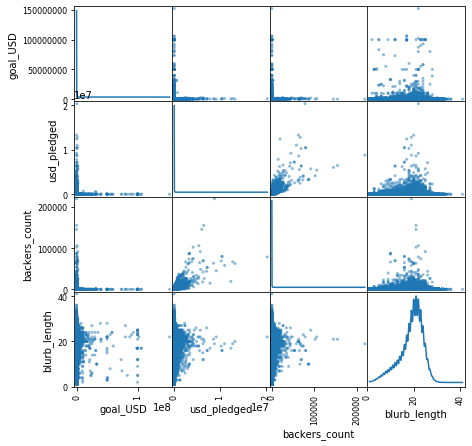

In [14]:
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=[7, 7], diagonal='kde')
plt.show()
#plt.savefig('kickstarter_correlation_plots.png')

In [15]:
kickstarter['log_goal'] = kickstarter.goal_USD.apply(lambda x: np.log1p(x))
kickstarter['log_usd_raised'] = kickstarter.usd_pledged.apply(lambda x: np.log1p(x))
kickstarter['log_backers'] = kickstarter.backers_count.apply(lambda x: np.log1p(x))
log_df = kickstarter[['log_goal', 'log_usd_raised', 'log_backers']]

corr = log_df.corr()
corr.style.background_gradient(cmap='Greens', axis=None).set_precision(2)

,log_goal,log_usd_raised,log_backers
log_goal,1,0.13,0.11
log_usd_raised,0.13,1,0.93
log_backers,0.11,0.93,1


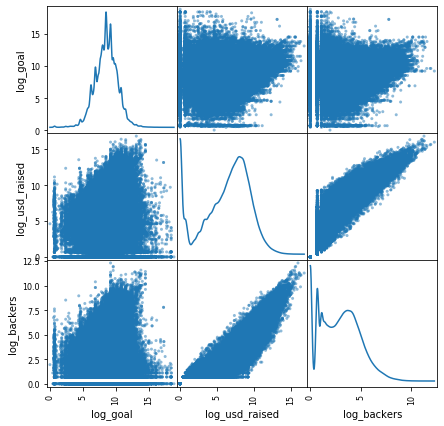

In [16]:
scatter_matrix = pd.plotting.scatter_matrix(log_df, figsize=[7, 7], diagonal='kde')
plt.show()
#plt.savefig('kickstarter_correlation_plots.png')

In [17]:
corr = log_df.corr()
corr.style.background_gradient(cmap='Greens', axis=None).set_precision(2)

,log_goal,log_usd_raised,log_backers
log_goal,1,0.13,0.11
log_usd_raised,0.13,1,0.93
log_backers,0.11,0.93,1


In [18]:
# chi-squared test with similar proportions

from scipy.stats import chi2_contingency
from scipy.stats import chi2


def chi2test(table):
    '''
    Performs a chi-squared test on a table of values.
    '''
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d' % dof)
    print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' %
         (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
        # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return p

In [19]:
chi2test(staff_pick)

dof=1
[[230275.1639447  26941.8360553]
 [155524.8360553  18196.1639447]]
probability=0.950, critical=3.841, stat=26155.567
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


0.0

In [20]:
chi2test(spotlight)

dof=1
[[170276.4865085  86940.5134915]
 [115002.5134915  58718.4865085]]
probability=0.950, critical=3.841, stat=325765.196
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


0.0

In [21]:
chi2test(category)

dof=158
[[7.10880561e+02 9.94397157e+02 4.82216965e+03 7.53855708e+02
  2.36960187e+02 2.24007955e+03 1.09586625e+03 7.48125688e+03
  6.71785114e+03 7.74149527e+02 2.47763661e+03 2.57612133e+03
  4.33929612e+02 1.60559925e+02 2.88888490e+02 3.65288752e+02
  5.12120505e+02 4.60789079e+02 3.31266760e+02 5.60049731e+03
  5.29429939e+02 3.58126227e+01 2.91872875e+02 2.10637909e+03
  2.60835269e+03 3.83493501e+03 1.74049346e+03 2.57254006e+02
  8.64277961e+02 5.65242562e+02 3.54962779e+03 2.74563441e+02
  1.37102657e+03 1.59963048e+02 1.20330412e+03 1.01707848e+03
  1.02304726e+03 8.21899691e+02 1.44444245e+03 5.99562992e+03
  2.42928957e+03 2.69669049e+03 1.88971272e+03 1.21762917e+02
  7.84893314e+02 9.47243870e+02 2.87694736e+02 1.11496632e+03
  3.36041776e+02 3.90357587e+02 3.92745096e+02 1.12511323e+03
  1.48443321e+03 8.65471715e+02 6.19737436e+03 9.13221879e+02
  7.50274446e+02 3.82001309e+02 2.16009803e+03 1.72736217e+03
  1.18599469e+03 3.65109688e+03 5.27639308e+02 4.94214193e+02


0.0

In [22]:
chi2test(slug)

dof=14
[[20700.88967322 13981.11032678]
 [ 9711.18952146  6558.81047854]
 [ 5645.85996826  3813.14003174]
 [ 2490.76790861  1682.23209139]
 [18985.46504602 12822.53495398]
 [18379.03796834 12412.96203166]
 [34115.1043816  23040.8956184 ]
 [15634.59731562 10559.40268438]
 [28881.68645142 19506.31354858]
 [ 3969.23234897  2680.76765103]
 [30546.97340685 20631.02659315]
 [ 6209.90877574  4194.09122426]
 [28157.67459588 19017.32540412]
 [27863.41421272 18818.58578728]
 [ 5925.1984253   4001.8015747 ]]
probability=0.950, critical=23.685, stat=22229.731
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


0.0

In [23]:
chi2test(top15countries)

dof=14
[[176156.1460365  119210.8539635 ]
 [ 25958.79841819  17567.20158181]
 [ 12012.04243304   8128.95756696]
 [  6234.73966511   4219.26033489]
 [  4338.79195176   2936.20804824]
 [  3462.08759862   2342.91240138]
 [  3112.5986524    2106.4013476 ]
 [  3485.94349939   2359.05650061]
 [  2782.1944268    1882.8055732 ]
 [  2127.34995078   1439.65004922]
 [  1744.46274349   1180.53725651]
 [  1233.35006959    834.64993041]
 [  1098.56423026    743.43576974]
 [  1340.70162303    907.29837697]
 [   889.22870104    601.77129896]]
probability=0.950, critical=23.685, stat=3378.981
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


0.0

In [24]:
chi2test(location)

dof=8
[[2.38929284e+05 1.61369716e+05]
 [9.01523089e+03 6.08876911e+03]
 [6.25765894e+03 4.22634106e+03]
 [1.46354251e+03 9.88457486e+02]
 [5.62258176e+02 3.79741824e+02]
 [6.60742889e+02 4.46257111e+02]
 [3.06794801e+02 2.07205199e+02]
 [1.61156802e+01 1.08843198e+01]
 [5.37189340e+00 3.62810660e+00]]
probability=0.950, critical=15.507, stat=984.800
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


2.8494790720056054e-207

In [25]:
chi2test(month)

dof=11
[[25872.82926778 17474.17073222]
 [22671.18079863 15311.81920137]
 [22038.49113097 14884.50886903]
 [22455.7081854  15166.2918146 ]
 [22387.66420228 15120.33579772]
 [21777.65586233 14708.34413767]
 [22693.26524929 15326.73475071]
 [20885.32468012 14105.67531988]
 [21497.72052824 14519.27947176]
 [20410.80742937 13785.19257063]
 [19733.35198335 13327.64801665]
 [14793.00068223  9990.99931777]]
probability=0.950, critical=19.675, stat=597.530
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


4.728426312484533e-121